In [1]:
import pandas as pd

In [2]:
!pip install geopandas


In [3]:
import geopandas as gpd

In [8]:
data=gpd.read_file("../../20_intermediate_files/30_campuses_w_dist_to_nearest_pp.geojson")

In [9]:
data['MSI'].value_counts()

                      1610
HSI                    276
HBCU                    84
AANAPISI & HSI          68
PBI                     66
AANAPISI                46
NASNTI                  17
TCU                     15
AANAPISI & ANNH         14
ANNH & NASNTI            8
HSI & PBI                6
ANNH & TCU               4
ANNH                     2
AANAPISI & PBI           2
ANNH, HSI & NASNTI       1
Name: MSI, dtype: int64

In [10]:
data.loc[(data['MSI'] =='HBCU') | (data['MSI']=='PBI'), 'MSI'] = 'HBCU_PBI'
data.loc[(data['MSI']==" "),'MSI']= 'PWI'
data.loc[(data['MSI']=="AANAPISI & HSI"),'MSI']= 'HSI'



In [11]:
data.loc[(data['MSI']!='HBCU_PBI') & (data['MSI']!='PWI') & (data['MSI']!='HSI') ,'MSI']= 'Misc'

In [12]:
data['MSI'].value_counts()

PWI         1610
HSI          344
HBCU_PBI     150
Misc         116
Name: MSI, dtype: int64

# Early Voting

In [13]:
data['distances_2020_early'].value_counts(dropna=False)

NaN             272
0.000000        186
807.795184        1
4088.059231       1
3620.470396       1
               ... 
2532.412356       1
10473.117185      1
3954.750582       1
254.518405        1
1642.481309       1
Name: distances_2020_early, Length: 1764, dtype: int64

In [14]:
data['distances_2020_early']=data['distances_2020_early']/1609

In [15]:
data['distances_2020_early'].value_counts()

0.000000    186
0.502048      1
0.470299      1
2.250137      1
0.827659      1
           ... 
1.573905      1
6.509085      1
2.457893      1
0.158184      1
1.020809      1
Name: distances_2020_early, Length: 1763, dtype: int64

In [16]:
#Droppings 272 rows (NA)

In [17]:
data_early=data.dropna(subset=['distances_2020_early'])

In [18]:
import matplotlib.pyplot as plt

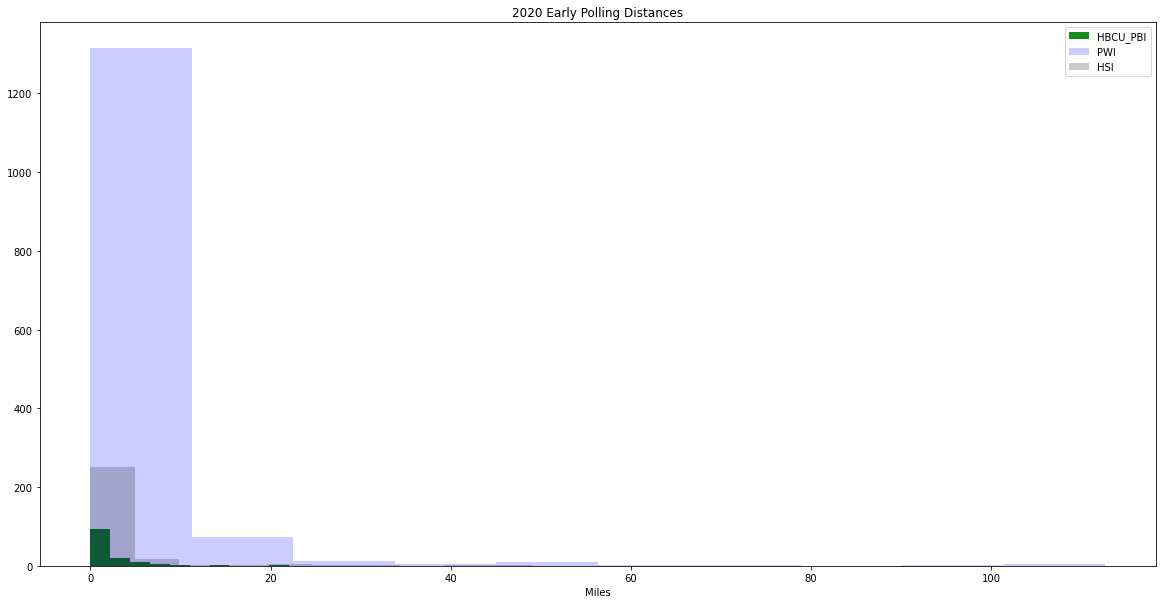

In [19]:
plt.figure(figsize=(20,10))
plt.hist(data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'],color='green',alpha=0.9,label='HBCU_PBI', bins=10)
plt.hist(data_early.query('MSI == "PWI"')['distances_2020_early'],color='blue',alpha=0.2, label='PWI',bins=10)
plt.hist(data_early.query('MSI == "HSI"')['distances_2020_early'],color='black',alpha=0.2, label='HSI',bins=10)
plt.title("2020 Early Polling Distances")
plt.xlabel("Miles")
plt.legend()
plt.show()




In [20]:
data_early.query('MSI == "PWI"')['distances_2020_early'].describe()

count    1427.000000
mean        3.993182
std         9.908791
min         0.000000
25%         0.492264
50%         1.333679
75%         3.288492
max       112.603767
Name: distances_2020_early, dtype: float64

In [21]:
data_early.query('MSI == "PWI"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000    5.956552
0.494360    0.070077
0.032765    0.070077
0.911058    0.070077
5.168549    0.070077
              ...   
3.034703    0.070077
1.860424    0.070077
0.907442    0.070077
1.102142    0.070077
1.020809    0.070077
Name: distances_2020_early, Length: 1343, dtype: float64

### ~6% of PWI have on campus early voting sites

In [22]:
100*len(data_early.query('MSI == "PWI"')['distances_2020_early'][data_early.query('MSI == "PWI"')['distances_2020_early']<5])/len(data_early.query('MSI == "PWI"'))

82.55080588647512

### ~83% of PWI have early voting sites either on campus or atleast 5 miles from the campus

-----------------------------------------

In [23]:
data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'].describe()

count    133.000000
mean       2.080133
std        2.892938
min        0.000000
25%        0.390826
50%        1.099075
75%        2.679979
max       22.031545
Name: distances_2020_early, dtype: float64

In [24]:
data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000    9.774436
0.052574    0.751880
8.801802    0.751880
0.031426    0.751880
1.573564    0.751880
              ...   
1.354012    0.751880
0.626859    0.751880
0.693635    0.751880
2.410975    0.751880
0.143904    0.751880
Name: distances_2020_early, Length: 121, dtype: float64

### ~10% of HBCU/PBI have on campus early voting sites

In [25]:
100*len(data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'][data_early.query('MSI == "HBCU_PBI"')['distances_2020_early']<5])/len(data_early.query('MSI == "HBCU_PBI"'))

88.7218045112782

### ~88.72% of HBCU/PBI have early voting sites either on campus or within 5 miles from Campus

---------------------

In [26]:
data_early.query('MSI == "HSI"')['distances_2020_early'].describe()

count    283.000000
mean       2.489474
std        6.144308
min        0.000000
25%        0.000000
50%        0.707473
75%        1.887948
max       49.119608
Name: distances_2020_early, dtype: float64

In [27]:
data_early.query('MSI == "HSI"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000    27.561837
0.502048     0.353357
0.423942     0.353357
0.509561     0.353357
0.729091     0.353357
              ...    
0.894003     0.353357
1.491473     0.353357
1.824682     0.353357
0.516581     0.353357
0.713442     0.353357
Name: distances_2020_early, Length: 206, dtype: float64

### ~28% of HSI have on campus early voting sites

In [28]:
100*len(data_early.query('MSI == "HSI"')['distances_2020_early'][data_early.query('MSI == "HSI"')['distances_2020_early']<5])/len(data_early.query('MSI == "HSI"'))

88.69257950530036

### ~88.72% of HSI have early voting sites either on campus or within 5 miles from Campus

--------

In [29]:
data_early.query('MSI == "Misc"')['distances_2020_early'].describe()

count    105.000000
mean       7.022026
std       15.826392
min        0.000000
25%        0.548532
50%        1.253198
75%        3.439083
max      111.272944
Name: distances_2020_early, dtype: float64

In [30]:
data_early.query('MSI == "Misc"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000     9.523810
53.338140    0.952381
1.767773     0.952381
46.049840    0.952381
55.421305    0.952381
               ...   
7.507629     0.952381
0.876779     0.952381
0.948993     0.952381
3.322668     0.952381
6.161558     0.952381
Name: distances_2020_early, Length: 96, dtype: float64

### ~10% of Misc have on campus early voting sites

In [31]:
100*len(data_early.query('MSI == "Misc"')['distances_2020_early'][data_early.query('MSI == "Misc"')['distances_2020_early']<5])/len(data_early.query('MSI == "Misc"'))

77.14285714285714

### ~77.14% of Misc have early voting sites either on campus or within 5 miles from Campus

------------

## Polling Place General

In [34]:
data['distances_2020'].value_counts(dropna=False)

NaN            572
0.000000       399
807.817134       1
769.312419       1
337.307767       1
              ... 
37.993328        1
52.784955        1
4833.507993      1
542.164249       1
820.905570       1
Name: distances_2020, Length: 1251, dtype: int64

In [36]:
data['distances_2020']=data['distances_2020']/1609

In [37]:
data_2020=data.dropna(subset=['distances_2020'])

In [38]:
data_2020.query('MSI == "PWI"')['distances_2020'].describe()

count    1210.000000
mean        0.568085
std         1.000558
min         0.000000
25%         0.028569
50%         0.241901
75%         0.693740
max        17.590581
Name: distances_2020, dtype: float64

In [39]:
data_2020.query('MSI == "PWI"')['distances_2020'].value_counts(normalize=True)*100

0.000000    20.495868
0.492641     0.082645
0.582607     0.082645
0.806514     0.082645
0.009141     0.082645
              ...    
0.443997     0.082645
0.181109     0.082645
0.318437     0.082645
0.287457     0.082645
0.510196     0.082645
Name: distances_2020, Length: 963, dtype: float64

### ~20% of PWI have polling locations on campus

In [40]:
100*len(data_2020.query('MSI == "PWI"')['distances_2020'][data_2020.query('MSI == "PWI"')['distances_2020']<5])/len(data_2020.query('MSI == "PWI"'))

99.33884297520662

### ~99% of PWI have polling locations within 5 miles from Campus

---------------

In [42]:
data_2020.query('MSI == "HBCU_PBI"')['distances_2020'].describe()

count    125.000000
mean       0.365705
std        0.533995
min        0.000000
25%        0.000000
50%        0.189682
75%        0.487041
max        3.037870
Name: distances_2020, dtype: float64

In [46]:
data_2020.query('MSI == "HBCU_PBI"')['distances_2020'].value_counts(normalize=True)*100

0.000000    29.6
0.608184     0.8
0.020367     0.8
0.103995     0.8
0.153069     0.8
            ... 
0.491716     0.8
0.220470     0.8
0.609102     0.8
0.331862     0.8
0.589911     0.8
Name: distances_2020, Length: 89, dtype: float64

### ~30% of HBCU/PBI have polling locations on campus

In [47]:
100*len(data_2020.query('MSI == "HBCU_PBI"')['distances_2020'][data_2020.query('MSI == "HBCU_PBI"')['distances_2020']<5])/len(data_2020.query('MSI == "HBCU_PBI"'))

100.0

### 100% of HBCU/PBI have polling locations within 5 miles from campus

---------------------

In [48]:
data_2020.query('MSI == "HSI"')['distances_2020'].describe()

count    242.000000
mean       0.430922
std        0.803183
min        0.000000
25%        0.000000
50%        0.088428
75%        0.524082
max        7.317574
Name: distances_2020, dtype: float64

In [50]:
data_2020.query('MSI == "HSI"')['distances_2020'].value_counts(normalize=True)*100

0.000000    41.735537
0.502062     0.413223
1.020529     0.413223
0.329470     0.413223
1.328597     0.413223
              ...    
0.787733     0.413223
0.286452     0.413223
0.418892     0.413223
0.438577     0.413223
0.713224     0.413223
Name: distances_2020, Length: 142, dtype: float64

### ~42% of HSI have polling locations on campus

In [51]:
100*len(data_2020.query('MSI == "HSI"')['distances_2020'][data_2020.query('MSI == "HSI"')['distances_2020']<5])/len(data_2020.query('MSI == "HSI"'))

99.17355371900827

### 99% of HSI have polling locations within 5 miles from campus

---------------------

In [52]:
data_2020.query('MSI == "Misc"')['distances_2020'].describe()

count    71.000000
mean      0.567584
std       0.952227
min       0.000000
25%       0.051668
50%       0.282393
75%       0.667691
max       6.352578
Name: distances_2020, dtype: float64

In [56]:
data_2020.query('MSI == "Misc"')['distances_2020'].value_counts(normalize=True).head(5)*100

0.000000    18.309859
0.654353     1.408451
0.143809     1.408451
0.681030     1.408451
0.281788     1.408451
Name: distances_2020, dtype: float64

### 18% of Misc Colleges have on campus polling places

In [57]:
100*len(data_2020.query('MSI == "Misc"')['distances_2020'][data_2020.query('MSI == "Misc"')['distances_2020']<5])/len(data_2020.query('MSI == "Misc"'))

98.59154929577464

### ~99% of Misc have polling locations within 5 miles from campus